In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
bike=pd.read_csv("BIKE DETAILS.csv")
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
bike.shape

(1061, 7)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
bike.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [ ]:
bike.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
bike['selling_price'].mean()

59638.151743638075

In [ ]:
bike['ex_showroom_price'].min()

30490.0

In [ ]:
bike['name'].unique()

array(['Royal Enfield Classic 350', 'Honda Dio',
       'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha SZ [2013-2014]',
       'Honda CB Twister', 'Honda CB Hornet 160R',
       'Royal Enfield Bullet 350 [2007-2011]', 'Hero Honda CBZ extreme',
       'Bajaj Discover 125', 'Yamaha FZ16', 'Honda Navi',
       'Bajaj Avenger Street 220', 'Yamaha YZF R3', 'Jawa 42',
       'Suzuki Access 125 [2007-2016]', 'Hero Honda Glamour',
       'Yamaha YZF R15 S', 'Yamaha FZ25', 'Hero Passion Pro 110',
       'Honda Navi [2016-2017]', 'Honda Activa i', 'Jawa Standard',
       'Royal Enfield Thunderbird 350', 'Honda Dream Yuga',
       'TVS Apache RTR 160 4V', 'Yamaha Fazer [2009-2016]',
       'Hero Honda Splendor NXG', 'Hero Glamour 125',
       'Yamaha FZ S [2012-2016]', 'Hero Xtreme Sports', 'Honda X-Blade',
       'Honda CB Shine SP', 'Honda Activa 5G', 'Honda CBR-250R',
       'Hero Honda Passion PRO [2012]', 'Bajaj Dominar 400',
       'Hero Glamour F

In [ ]:
bike['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [ ]:
bike['seller_type'].value_counts()['Individual']

1055

In [ ]:
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


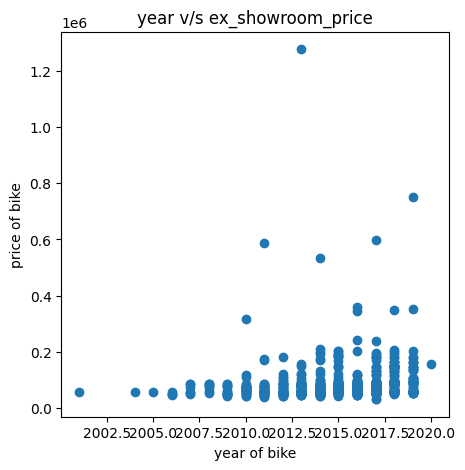

In [ ]:
#Scatter plot
plt.figure(figsize=(5,5))
plt.title("year v/s ex_showroom_price")
x=bike['year']
y=bike['ex_showroom_price']
plt.scatter(x,y)
plt.xlabel('year of bike')
plt.ylabel('price of bike')
plt.show()

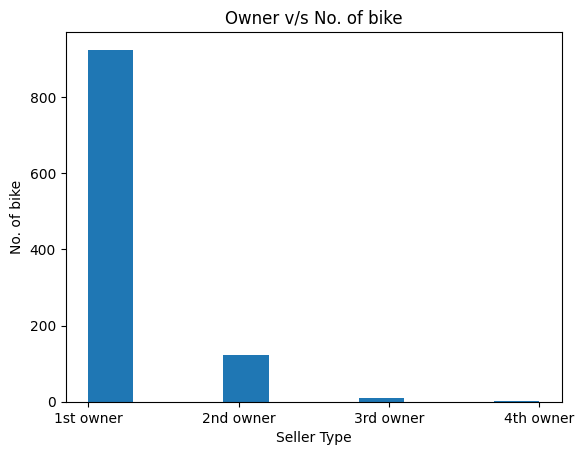

In [ ]:
#Histogram
plt.hist(bike['owner'])
plt.xlabel('Seller Type')
plt.ylabel('No. of bike')
plt.title("Owner v/s No. of bike")
b= bike['owner'].value_counts()

plt.show()

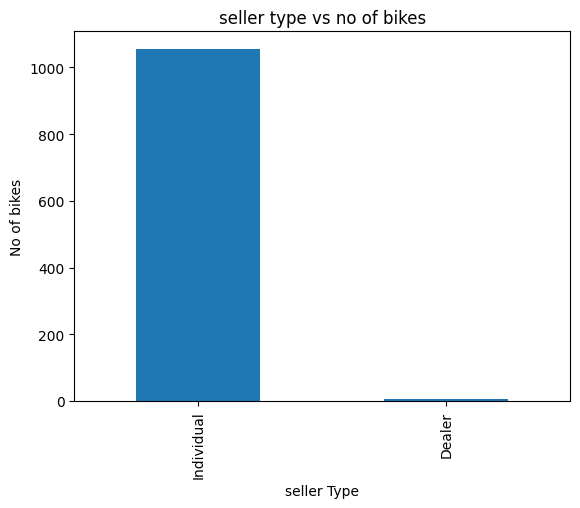

In [ ]:
#Bar plot
bike['seller_type'].value_counts().plot(kind='bar')
plt.xlabel('seller Type')
plt.ylabel('No of bikes')
plt.title("seller type vs no of bikes")
b=bike['seller_type'].value_counts()
plt.show()

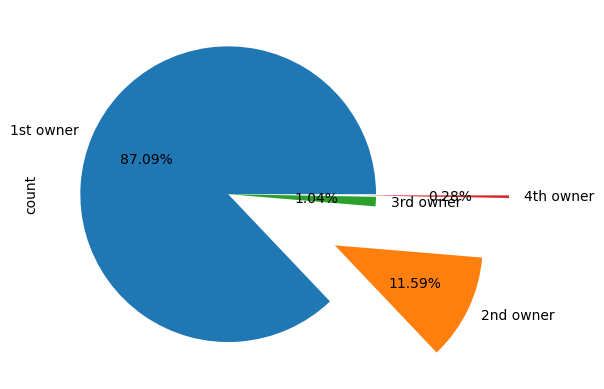

In [ ]:
# 4. Pie plot

bike['owner'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=(0,0.8,0,0.9))
plt.show()

In [ ]:
# Preprocessing

# Handle categorical data

le = LabelEncoder()
bike['year'] = le.fit_transform(bike['name'])

In [ ]:
# separating feature and target

X = bike.iloc[:,:-1]     # all col except price
y = bike.iloc[:,-1]      # all rows of last col

In [ ]:
y.head()

0         NaN
1         NaN
2    148114.0
3     89643.0
4         NaN
Name: ex_showroom_price, dtype: float64

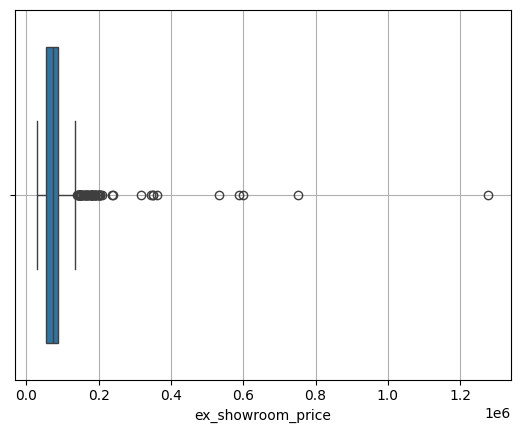

In [ ]:
# Find out outliers

sns.boxplot(data=X,x=y)
plt.grid()
plt.show()

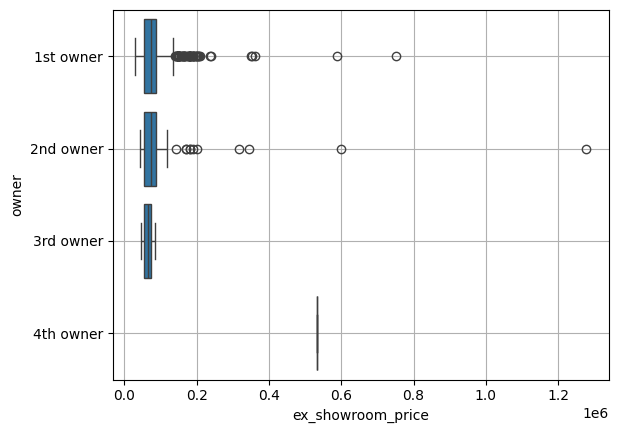

In [ ]:
sns.boxplot(data=X,x=y,y='owner')
plt.grid()
plt.show()

In [ ]:
X[(X.owner=='2nd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
11,Honda Navi,28000.0,152,Individual,2nd owner,10000
17,Yamaha YZF R15 S,40000.0,274,Individual,2nd owner,45000
22,Honda Activa i,32000.0,128,Individual,2nd owner,20696
32,Hero Xtreme Sports,43000.0,120,Individual,2nd owner,50000
47,Yamaha FZ16,30000.0,254,Individual,2nd owner,26000
...,...,...,...,...,...,...
1044,Bajaj Pulsar 150,25000.0,35,Individual,2nd owner,26000
1051,Bajaj Discover 125,20000.0,21,Individual,2nd owner,25000
1052,Hero Hunk,20000.0,92,Individual,2nd owner,49000
1053,Hero Ignitor Disc,20000.0,59,Individual,2nd owner,24000


In [ ]:
X[(X.owner=='3rd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
28,Yamaha Fazer [2009-2016],40000.0,261,Individual,3rd owner,35000
202,Bajaj Pulsar 135 LS,56000.0,34,Individual,3rd owner,37714
457,Mahindra Flyte,22000.0,172,Individual,3rd owner,20000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bike[['owner', 'ex_showroom_price']] = scaler.fit_transform(bike[['year', 'selling_price']])

In [ ]:
X=bike['owner'] #feature

y=bike["selling_price"]  #target

In [ ]:
# Split dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
# Model : Linear Regression Model

lr = LinearRegression()

In [ ]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
#intercept

lr.intercept_

-11052544.176615192

In [ ]:
#Slope

lr.coef_

array([5518.25077929])

In [ ]:
# Calculating ypredict
y_pred = lr.predict(np.array(x_train).reshape(-1,1))
y_pred

In [ ]:
plt.figure()
#sns.scatterplot(x_train,y_train)
plt.plot(x_train,y_pred)
plt.show()

In [ ]:
#testing
y_pred=lr.predict(np.array(x_test).reshape(-1,1))
y_pred

In [ ]:
#Evalution of model
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(rmse)
print(mae)

1693927242.7194211
41157.347372242315
27848.499991090062


In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.20309655002764893